### transformers

The TrOCR model is an encoder-decoder model, consisting of an image Transformer as encoder, and a text Transformer as decoder. The image encoder was initialized from the weights of BEiT, while the text decoder was initialized from the weights of RoBERTa.

Images are presented to the model as a sequence of fixed-size patches (resolution 16x16), which are linearly embedded. One also adds absolute position embeddings before feeding the sequence to the layers of the Transformer encoder. Next, the Transformer text decoder autoregressively generates tokens.


* https://huggingface.co/microsoft/trocr-large-printed

In [12]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# Load the processor and model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')



Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decod

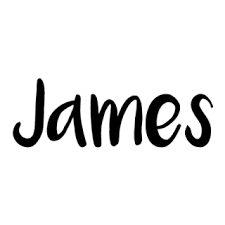

In [13]:

# Load an image
image_path =  "../handwriting.png"
image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
image

In [14]:
image.size

(225, 225)

In [16]:

# Establecer el nuevo tamaño (ancho, alto)
new_size = (384, 384)  # ejemplo: 800x600 pixels

# Redimensionar la imagen
image = image.resize(new_size)

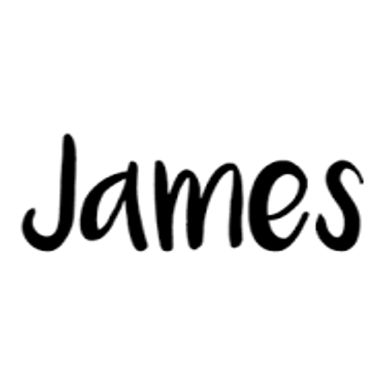

In [17]:
image

In [18]:

# Preprocess the image
pixel_values = processor(images=image, return_tensors="pt").pixel_values



In [19]:

# Generate text
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print(f"Detected text: {generated_text}")


Detected text: JAMES
